In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [3]:

n=10 #nombre de discretisation
Qm=10 #charge max
x0=0
xf=200
listet=np.linspace(x0,xf,n+1)
len(listet)
K=3
Qmax=[10 for i in range (K)]
T=[[0,50],[20,180],[90,180]]
C=[[30,50],[60,90],[20,35]]
Imax=10

In [4]:
def PrixHoraire(t,ph,pb):
    n=np.floor(t)
    if n%50 < 24:
        return ph
    else:
        return pb

I est une matrice I=[I1,...,Ik] ou chaque Ik est une liste qui contient l'intensité pour chaque temps pour la voiture k

In [6]:
def fcoutk(k,I,n):
    s=0
    for i in range (n-1):
        s+=I[k][i]*(listet[i+1]-listet[i])
    return s

In [7]:
def fcout(I,n):
    s=0
    for k in range (len(I)):
        s+=fcoutk(k,I,n)
    return s
        

On construit maintenant les fonctions contraintes, on l'écrit sous la forme $c_1(y_1^1,....,y_n^1)+....+c_k(y_1^k,....,y_n^k)$

Qmax est la liste des $Qm^k$

T est la liste des temps d'arrivé et de départ

$k \in \{0,...,K-1\}$

In [99]:
def ck(k,Qmax,T):
    K=len(Qmax)#pour obtenir le nombre de véhicules
    A=np.zeros((2n+2*n*K+2*K+2*n*K,n))
    #contrainte de réseau
    for i in range(n):
        A[i,2*i]=1
        A[i,2*i+1]=-1
    #contrainte de borne
    for i in range(n):
        A[2*i+n*(k+1),i]=1
        A[2*i+1+n*(k+1),i]=-1
    #contrainte de chargement
    for j in range (n):
        A[n*(1+2*K)+k,j]=listet[j+1]-listet[j]
        A[n*(1+2*K)+k+1,j]=-(listet[j+1]-listet[j])
    #contrainte de présence
    x0k,xfk=T[k]
    for i in range (n):
        if listet[i]<x0k or listet[i]>=xfk:
            A[2*i+n*(2*K+1)+2*K+(k)*2*n,i]=1
            A[2*i+1+n*(2*K+1)+2*K+(k)*2*n,i]=-1
    return A

In [100]:
np.shape(ck(1,Qmax,T))

(136, 10)

In [101]:
def print_matrice(A):
    s=""
    m,n=np.shape(A)
    for i in range (m):
        s+="["
        for j in range (n):
            s+=str(A[i,j])+","
        s+="] \n"
    print(s)

In [48]:
print_matrice(ck(1,Qmax,T))

[-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,] 
[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,] 
[0.0,0.0,0.0,0.0

In [102]:
def c(I,Qmax,T,Imax,C):
    K=len(Qmax)
    b=np.zeros((n+2*n*K+2*K+2*n*K,1))
    #contrainte de réseau
    for i in range (n):
        b[i,0]=Imax
    #contrainte de borne
    for i in range(2*n*K):
        b[i+n,0]=Imax
    #contrainte de chargement
    for k in range (K):
        c0k,cfk=C[k]
        b[n+2*n*K+2*k,0]=Qmax[k]*(cfk-c0k)
        b[n+2*n*K+2*k+1,0]=-Qmax[k]*(cfk-c0k)
    #contrainte de présence (rien à faire car ce sont des inégalités avec 0)
    
    D=np.zeros((n+2*n*K+2*K+2*n*K,1))
    
    for k in range (K):
        yk=np.array(I[k])
        
        D+=np.dot(ck(k,Qmax,T),yk.reshape((n,1)))
    return D-b

On définit une intensité qui soit valable pour vérifier que les contraintes soient bien écrites, cette intensité sera le point de départ de l'algorithme d'optimisation.

In [103]:
def I0(Qmax,T,Imax,C):
    K=len(Qmax)
    I=[[0 for i in range(n)] for j in range(K)]
    for k in range(K):
        c0k,cfk=C[k]
        x0k,xfk=T[k]
        Ik=Qmax[k]*(cfk-c0k)/(xfk-x0k)
        for i in range(n):
            if listet[i]>=x0k and listet[i]<xfk:
                I[k][i]=Ik
    return I
        
    

In [104]:
I0(Qmax,T,Imax,C)

[[4.0, 4.0, 4.0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1.875, 1.875, 1.875, 1.875, 1.875, 1.875, 1.875, 1.875, 0],
 [0,
  0,
  0,
  0,
  0,
  1.6666666666666667,
  1.6666666666666667,
  1.6666666666666667,
  1.6666666666666667,
  0]]

In [105]:
def affichage(Qmax,I,T,C,Imax):
    K=len(Qmax)
    for k in range(K):
        
        plt.plot(listet[:n],I[k],label=f"voiture {k}")
    plt.legend()
    plt.show()

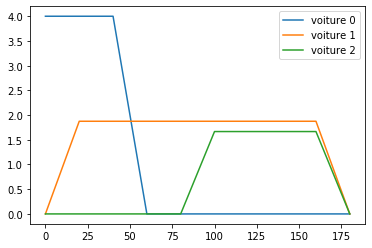

In [106]:
affichage(Qmax,I0(Qmax,T,Imax,C),T,C,Imax)

In [107]:
A=np.array(I0(Qmax,T,Imax,C))
A[1]
A[1].reshape((10,1))
np.dot(A,A[1].reshape((10,1)))

array([[15.   ],
       [28.125],
       [12.5  ]])

In [108]:
def check_contraintes(I,Qmax,T,Imax,C):
    cont=c(I,Qmax,T,Imax,C)
    print(np.shape(cont))
    #contrainte de réseau
    flag1="OK"
    for i in range (n):
        if cont[i]>0:
            flag1="NO"
            break
    print(f"contraine de réseau : {flag1}")
    #contrainte de borne
    flag2="OK"
    for i in range(2*n*K):
        if cont[i+n]>0:
            flag2="NO"
            break
    print(f"contraine de borne : {flag2}")
    #contrainte de chargement
    flag3="OK"
    for i in range (2*K):
        if cont[i+n+2*n*K]>0:
            flag3="NO"
            break
    print(f"contraine de chargement : {flag3}")
    #contrainte de presence
    flag4="OK"
    for i in range (2*K*n):
        if cont[i+n+2*n*K+2*K]>0:
            flag4="NO"
            break
    print(f"contraine de présence : {flag4}")
    return cont
        

In [109]:
print_matrice(check_contraintes(I0(Qmax,T,Imax,C),Qmax,T,Imax,C))

(136, 1)
contraine de réseau : OK
contraine de borne : OK
contraine de chargement : NO
contraine de présence : OK
[-14.0,] 
[-15.875,] 
[-15.875,] 
[-11.875,] 
[-11.875,] 
[-13.541666666666668,] 
[-13.541666666666668,] 
[-13.541666666666668,] 
[-13.541666666666668,] 
[-10.0,] 
[-6.0,] 
[-14.0,] 
[-6.0,] 
[-14.0,] 
[-6.0,] 
[-14.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-8.125,] 
[-11.875,] 
[-10.0,] 
[-10.0,] 
[-8.333333333333334,] 
[-11.666666666666666,] 
[-8.333333333333334,] 
[-11.666666666666666,] 
[-8.333333333333334,] 
[-11.666666666666666,] 
[-8.333333333333334,] 
[-11.666666666666666,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-10.0,] 
[-1